# TensorFlow / Keras

- ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리
- 2015년 release : 딥러닝 세계의 관점에서 꽤 오래된 라이브러리
- Keras : 사용자가 TensorFlow를 좀 더 쉽고 편하게 사용할 수 있게 해 주는 high level API 제공
- TensorFlow 2.x : Keras를 딥러닝의 공식 API로 채택, Keras는 TensorFlow 내 하나의 framework로 개발됨

```python
pip install --upgrade tensorflow
```

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


## 1. MNIST dataset download
- 사람의 손글씨 숫자

In [3]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [9]:
# Model 생성, compile
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training / Evaluation
- epochs : 현재 6만 장의 train 데이터를 10번 집어 넣어서 학습하겠다

In [10]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1456 - accuracy: 0.9559
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9666
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0903 - accuracy: 0.9717
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0771 - accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0660 - accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9807
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0537 - accuracy: 0.9821
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0503 - accuracy: 0.9837
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0692 

[0.06922704726457596, 0.9797000288963318]

In [13]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

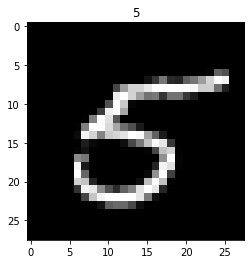

In [17]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

## 2. 내가 쓴 손글씨 Test 해보기
- Colab을 쓰는 경우 아래 코드 실행하면 파일 업로드 가능 ★

```python
import os
import PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print("User uploaded file '{name}' with length {length} bytes".format(name=fn, length=len(uploaded[fn])))
```

In [19]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')

# image file 읽기
cur_img = Image.open(img_path)

# 28×28로 resize
cur_img = cur_img.resize((28,28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
    image = np.mean(image, axis=2)
except:
    pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로,
# MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)

# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.

# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# shape를 변경하여 학습된 model에 넣고 결과 확인
image = np.reshape(image,(1,28,28))   # 1장의 이미지를 28×28로 변경
print(model.predict(image))

print("Model이 예측한 값은 {} 입니다.".format(np.argmax(model.predict(image), -1)))

## 3. Tensor
- Tensor는 multi-dimensional array를 의미
  - 보통 1차원은 vector, 2차원은 matrix, 3차원 이상은 tensor라고 부르지만, 1차원부터 다 합쳐서 tensor라고 할 수도 있음
- TensorFlow의 기본 data type
- numpy와 매우 비슷
- print하면 숫자, shape, data type까지 출력 (numpy의 array와 차이점)

In [23]:
# Hellow World
hello = tf.constant([3,3], dtype=tf.float32)
print(hello)

hello = tf.constant('Hello World')
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)
tf.Tensor(b'Hello World', shape=(), dtype=string)


- 상수형 tensor는 아래와 같이 생성 가능

In [24]:
x = tf.constant([[1.0, 2.0],
                [1.0, 4.0]])

print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [1. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 3.1 numpy ndarray나 python의 list도 tensor로 변형 가능
- 방법1) tf.convert_to_tensor 사용
- 방법2) tf.constant 안에 넣기

In [25]:
x_np = np.array([[1.0, 2.0],
                [3.0, 4.0]])

x_list = [[1.0, 2.0],
         [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [26]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 3.2 tensor를 numpy ndarray로 바꾸기

In [27]:
x.numpy()

array([[1., 2.],
       [1., 4.]], dtype=float32)

In [28]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


### 3.3 Numpy와 비슷한 Tensor의 사용 예시

In [29]:
a = tf.ones((2,3))
b = tf.zeros((2,3))
c = tf.fill((2,3),2)
print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2 2]
 [2 2 2]], shape=(2, 3), dtype=int32)


- zeros_like, ones_like : 모양 + type까지 가져옴

In [30]:
d = tf.zeros_like(c)
e = tf.ones_like(c)
print(d)
print(e)

tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)


In [31]:
f = tf.eye(3)
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [32]:
g = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


- tf.random.uniform
  - 0~1사이 uniform distribution에서 추출 (default)
  - 0~1 말고 최대값, 최소값 직접 정할 수도 있음
  - numpy - rand와 같은 역할
- tf.random.normal
  - normal distribution에서 추출
  - numpy - randn와 같은 역할

In [33]:
h = tf.random.uniform((2,2))
i = tf.random.normal((2,2))
print(h)
print(i)

tf.Tensor(
[[0.6855347  0.816579  ]
 [0.2863512  0.49557817]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.7230794   1.0355691 ]
 [-0.95609325 -2.2425907 ]], shape=(2, 2), dtype=float32)


### 3.4 Tensor의 속성

In [36]:
tensor = tf.random.normal((3,4))

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (3, 4)
Datatype of tensor: <dtype: 'float32'>


<b>속성 변경하기</b>

In [37]:
tensor = tf.reshape(tensor, (4,3))
tensor = tf.cast(tensor, tf.int32)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (4, 3)
Datatype of tensor: <dtype: 'int32'>


### 3.5 Variable

- 변할 수 있는 상태를 저장하는데 사용되는 특별한 tensor
- Deep Learning에서는 학습해야 하는 가중치(weight, bias)들을 variable로 생성

<b>원래 tensor는 한 번 생성하면 값 변경 불가능</b>

In [41]:
tensor = tf.ones((3,4))
print(tensor)

tensor[0,0] = 2.  # Error 발생

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

### variable 만들기, 값 변경

- Variable 값 갱신을 위해 사용하는 method
  - .assign(value)
  - .assign_add(increment)
  - .assign_sub(decrement)

In [39]:
variable = tf.Variable(tensor)
print(variable)

variable[0,0].assign(2)
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


방법1) 초기값을 사용해서 variable 생성

In [40]:
initial_value = tf.random.normal(shape=(2,2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.6286157 , -0.5081501 ],
       [-0.06615821,  0.5985295 ]], dtype=float32)>


방법2) variable을 초기화해주는 initializer를 사용할 수도 있음

In [43]:
weight = tf.Variable(tf.random_normal_initializer(stddev=1.)(shape=(2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.1672525 , -1.4480114 ],
       [-0.12264338,  2.9391346 ]], dtype=float32)>


In [44]:
new_value = tf.random.normal(shape=(2,2))
print(new_value)

weight.assign(new_value)
print(weight)

tf.Tensor(
[[-1.0902548  -0.27526107]
 [ 0.09933869 -0.03591168]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.0902548 , -0.27526107],
       [ 0.09933869, -0.03591168]], dtype=float32)>


In [45]:
added_value = tf.ones(shape=(2,2))
weight.assign_sub(added_value)       # 뺄셈
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.0902548, -1.275261 ],
       [-0.9006613, -1.0359117]], dtype=float32)>


### 3.6 Indexing과 Slicing

In [46]:
a = tf.range(1,13)
a = tf.reshape(a, (3,4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


indexing
- numpy와 마찬가지로 indexing을 하면 차원 감소

In [49]:
print(a[1])
print(a[0,-1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


slicing
- numpy와 마찬가지로 slicing은 해도 차원 유지

In [50]:
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### 3.7 Transpose

In [51]:
a = tf.range(16)
a = tf.reshape(a, (2,2,-1))
print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [53]:
b = tf.transpose(a, (2,0,1))  # 축의 순서를 2번째 축, 0번째 축, 1번째 축으로 바꾸기
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


### 3.8 Tensor 연산

- Numpy와 동일하게 작동됨

In [54]:
x = tf.constant([[1,2],[3,4]], dtype=tf.float32)
y = tf.constant([[5,6],[7,8]], dtype=tf.float32)
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [55]:
print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x@y)
print('='*30)
print(tf.add(x,y))
print(tf.subtract(x,y))
print(tf.multiply(x,y))
print(tf.divide(x,y))
print(tf.matmul(x,y))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [56]:
z = tf.range(1,11)
z = tf.reshape(z, (2,5))
print(z)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [58]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [57]:
sum1 = tf.reduce_sum(z, axis=0)
sum2 = tf.reduce_sum(z, axis=1)
sum3 = tf.reduce_sum(z, axis=-1)
print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


### 3.8.1 concat
- 차원 유지

In [59]:
concat = tf.concat([z,z], axis=0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [60]:
concat = tf.concat([z,z], axis=-1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


### 3.8.2 stack

- 축을 하나 생성하면서 합치기 → 차원 증가
  - 0 : 맨 앞에 추가
  - -1 : 맨 뒤에 추가

In [63]:
stack = tf.stack([z,z], axis=0)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [64]:
stack = tf.stack([z,z], axis=-1)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)


In [65]:
stack = tf.stack([z,z], axis=1)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 1  2  3  4  5]]

 [[ 6  7  8  9 10]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


---
# Dataset

Data를 처리하며 model에 공급하기 위하여 TensorFlow에서는 tf.data.Dataset 사용</br>
keras.datasets 아래 다양한 dataset 있음
- boston_housing : boston 집값 예측
- cifar10, cifar100, fashion_mnist : 이미지 data
- imdb : 영화평
- mnist : 손글씨 숫자
- reuters : 기사

## 1. FashionMNIST data 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Train/Test의 images, labels의 shape 확인

In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
type(train_images)

numpy.ndarray

training set의 각 class 별 image 수 확인
- return_counts : 몇 개씩 있는지 세고 그 숫자 return

In [5]:
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

test set의 각 class 별 image 수 확인

In [6]:
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

## 2. Data 시각화하기

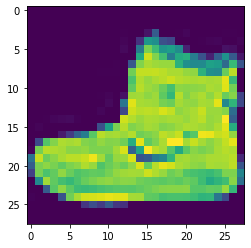

In [7]:
plt.imshow(train_images[0])

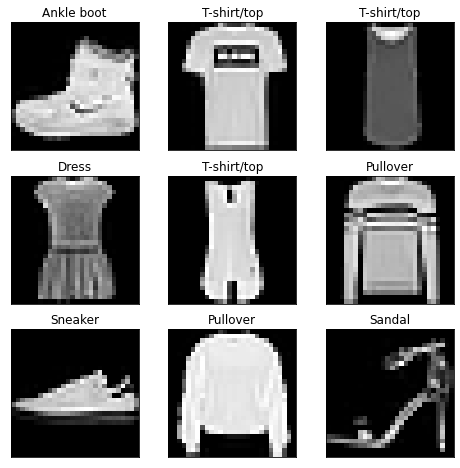

In [8]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

## 3. Data 전처리

★ image를 0~1 사이 값으로 만들기 위하여 255로 나누기
- image는 보통 1~255 값으로 되어 있음
- 먼저 floating point로 type 변경 필요

In [9]:
train_images = train_images.astype(np.float32)/255.
test_images = test_images.astype(np.float32)/255.

### one-hot encoding

- 10개 카테고리 중 한 개를 예측해야 하는 상황에서
  - one-hot encoding을 안 하면
    - label값 출력해보면 정답 class만 나옴
  - one-hot encoding 하면
    - 입력값이 0번 class일 확률, 1번 class일 확률, ..., 10번 class일 확률 모두 보고
    - 확률값이 가장 큰 정답 class만 1로 하고 나머지는 다 0 처리해서 전체 출력

one-hot encoding 하기 전

In [10]:
train_labels[0]

9

one-hot encoding 한 후

In [11]:
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [12]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## 4. Dataset 만들기

- 현재 데이터가 numpy array로 되어 있음
- from_tensor_slices(numpy array)
  - tensor를 slice 해주는 함수
  - 학습데이터 (60000, 28, 28)가 입력되면, 60000개의 slices로 만들고 각각의 slice는 28×28의 이미지 크기를 갖게 됨
- shuffle(n) : 데이터를 매번 잘 섞기
  - n : 몇 개의 데이터로 shuffle 할지
    - 만약 10개 데이터 있는데 shuffle(5)라고 하면 모든 데이터로 shuffle 하지 못하는 것
    - 학습데이터 개수보다 높은 숫자기만 하면 완전 shuffle
  - train 데이터는 shuffle 안 하면, 매번 똑같은 순서로 data가 input 되어서 학습에 좋지 않음
  - test 데이터는 shuffle을 할 필요 없음 (결과만 확인하는 데이터이기 때문)
- batch : 데이터를 공급할 때 이미지를 한 장씩 넣는 게 아니라 여러 장씩 넣는 것
  - batch 설정 안 하면 데이터 한 개씩 넣음
  - batch(64) : 전체 이미지를 64 블록으로 끊어서 첫 번째 블록부터 통으로 넣어라
  - i.e. 이미지 category가 10개 있는데 batch(2) : 2개씩 끊어서 넣어라 = 5장씩 넣어라

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=10000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

사용법
- for문 사용
- batch size가 64이기 때문에 한 번에 이미지가 {'이미지 총 개수/64'}장씩 들어갔음
  - images, labels 출력해 보면 64개 이미지에 대한 image와 label 출력됨
  - 그 첫 번째 for loop에서 64개 이미지 중에서도 첫 번째 이미지만 살펴보면 아래와 같음

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


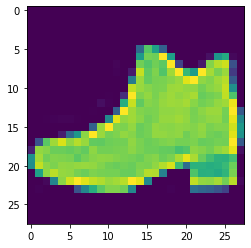

In [14]:
for images, labels, in train_dataset:
    print(labels[0])
    plt.imshow(images[0])
    break

Dataset을 통해 반복하기 : iterate</br>
이미지와 정답(label) 표시

Feature batch shape: (64, 28, 28)
Labels batch shape: (64, 10)


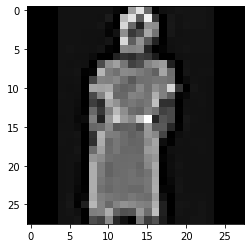

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [15]:
imgs, lbs = next(iter(train_dataset))
print(f"Feature batch shape: {imgs.shape}")
print(f"Labels batch shape: {lbs.shape}")

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {lb}")

## 5. Custom Dataset 만들기

- keras 데이터가 아닌 내가 가지고 있는 데이터를 활용하고 싶은 경우

In [16]:
# 0~9 데이터
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

# for문에서 데이터를 하나씩 출력
for x in ds_tensors:
    print(x.numpy())

[0 1 2 3 4 5 6 7 8 9]
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
0
1
2
3
4
5
6
7
8
9


data 전처리(변환), shuffle, batch 추가
- map 안에 내가 만든 함수 자유롭게 넣고 사용
- ex) 숫자를 0~9 넣는 게 아니라 제곱을 해서 넣고 싶은 경우 : tf.square 
- data는 10개고 batch는 2니까 2개씩 끊어서 데이터 내보냄 = 5장씩 뽑음

In [17]:
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [18]:
for _ in range(3):          # epoch
    for x in ds_tensors:
        print(x)
    print("="*50)

tf.Tensor([64  0], shape=(2,), dtype=int32)
tf.Tensor([49  4], shape=(2,), dtype=int32)
tf.Tensor([36 16], shape=(2,), dtype=int32)
tf.Tensor([81  1], shape=(2,), dtype=int32)
tf.Tensor([25  9], shape=(2,), dtype=int32)
tf.Tensor([ 9 64], shape=(2,), dtype=int32)
tf.Tensor([25  4], shape=(2,), dtype=int32)
tf.Tensor([36 81], shape=(2,), dtype=int32)
tf.Tensor([ 0 16], shape=(2,), dtype=int32)
tf.Tensor([49  1], shape=(2,), dtype=int32)
tf.Tensor([0 9], shape=(2,), dtype=int32)
tf.Tensor([81  1], shape=(2,), dtype=int32)
tf.Tensor([16 25], shape=(2,), dtype=int32)
tf.Tensor([36 64], shape=(2,), dtype=int32)
tf.Tensor([ 4 49], shape=(2,), dtype=int32)


---
# Model

### TensorFlow에서는 크게 세 가지 모델 제공
1. Keras Sequential API 사용
2. Keras Functional API 사용
3. Model Class Subclassing 사용

## 1. Keras Sequential API

- 벽돌처럼 쭉 일렬로 쌓는 모델 생성
- 가장 쉽고 가장 기본적인 모델 생성 방법
  - 강사님은 기본적으로 sequential model을 사용해서 모델을 만들 수 있으면 그냥 이걸 사용함
    - 굳이 다른 어려운 걸 쓸 필요 없음

In [19]:
# multi-layer perceptron 구현

def create_seq_model():
    model = keras.Sequential()                            # keras에 sequential이라고 선언
    
    # layer 하나씩 쌓기 ===========================================
    # Flatten과 Dropout은 레이어 개수에서 쳐주진 않음
    # 아래 코드는 레이어 두 개짜리 모델
    
    # Flatten
    # 1) multi-layer perceptron에 넣으려면 input을 1차원 vector로 꼭 펴줘야 함
    # 2) input_shape 형태 꼭 알려줘야 함
    # → 이 레이어에 28×28 matrix가 들어올 거야, 이걸 펴줘
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    
    # 첫 번째 레이어 : Dense
    # 128개의 perceptron으로 구성된 레이어
    model.add(keras.layers.Dense(128, activation='relu'))
    
    # Dropout
    # overfitting 방지
    model.add(keras.layers.Dropout(0.2))
    
    # 두 번째 레이어 : Dense
    # 10개 perceptron으로 구성된 레이어
    # → 이게 output layer가 될 것임
    #    output으로는 숫자가 10개가 나와야 함
    #    perceptron 10개니까 perceptron 한 개마다 결과가 한 개씩 나올 것임
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [20]:
seq_model = create_seq_model()

### 결과
- 첫 번째는 flatten을 했어
  - Output Shape
    - None : batch size
    - 784 : 28×28 이미지가 들어와서 784로 펴지게 될 거야
  - Param# : 0 
    - 이 레이어에서는 학습이 되는 게 아니라 1차원으로 펴주기만 하니 param 없음
- 첫 번째 dense 레이어
  - Output Shape 128 : perceptron 128개 썼으니, 128로 바뀌게 됨
  - Param# : 100480
- Dropout
  - 모양은 변함 없음
- 두 번째 dense 레이어
  - 최종적으로 Output 10개가 나오는 모양이 됨 
  - Param# : 1290
- 전체 parameter 수는 101,770개
- 그 중 training 가능한 parameter은 101,770개

In [21]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 2. Keras Functional API 사용

- Keras Sequential API와 차이점
  - sequential 선언, model.add가 없음
  - 즉, 벽돌처럼 쌓는 방식이 아님
- Keras Sequential API보다 훨씬 자유롭고 다양한 모델 생성 가능
  - 가지치기 등

In [22]:
def create_func_model():
    inputs = keras.Input(shape=(28,28))
    
    # 벽돌처럼 쌓는 방식이 아니기 때문에, input을 매번 명시해 줘야 함 ★
    # 바느질로 연결한다고 생각하면 됨
    flatten = keras.layers.Flatten()(inputs)                      # 이 레이어의 input : input
    dense = keras.layers.Dense(128, activation='relu')(flatten)   # 이 레이어의 input : flatten
    drop = keras.layers.Dropout(0.2)(dense)                       # 이 레이어의 input : dense
    outputs = keras.layers.Dense(10, activation='softmax')(drop)  # 이 레이어의 input : drop
    model = keras.Model(inputs=inputs, outputs=outputs)           # 최종 모델 생성
    return model

In [23]:
func_model = create_func_model()

In [24]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 3. Model Class Subclassing 사용

- pytorch에서는 이것과 유사한 방법 사용 중
- keras.Model : keras의 Model class를 상속 받아서 class 생성

In [25]:
class SubClassModel(keras.Model):
    
    def __init__(self):
        # layer 초기화
        super(SubClassModel, self).__init__()
        self.flatten = keras.layers.Flatten(input_shape=(28,28))
        self.dense1 = keras.layers.Dense(128, activation='relu')
        self.drop = keras.layers.Dropout(0.2)
        self.dense2 = keras.layers.Dense(10, activation='softmax')
    
    # 원래는 __call__이라고 써야 되는데 keras.Model class를 상속받으면
    # 'call' method가 __call__을 자동으로 불러옴
    # 그래서 그냥 'call'이라고 써도 됨
    # ★ 주의) 'training' 인자 꼭 넣어야 함 
    #       Dropout이 training할 때와 test할 때 동작 방식이 다르기 때문에
    #       현재 training인지 test인지 입력으로 알려줘야 함
    def call(self, x, training=False):
        # 다 엮어주는 바느질 작업
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.drop(x)
        return self.dense2(x)

In [26]:
subclass_model = SubClassModel()

이 모델은 summary를 보려면 input이 한 번 들어가서 build 되는 과정이 필요함

In [27]:
inputs = tf.zeros((1,28,28))
subclass_model(inputs)
subclass_model.summary()

Model: "sub_class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  100480    
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 가상의 data 만들어서 예측해보기

In [28]:
# (1,28,28) : 'batch size=1'이라는 의미
inputs = tf.random.normal((1,28,28))
outputs = subclass_model(inputs)
pred = tf.argmax(outputs, -1)     # argmax : 제일 큰 값의 위치 뽑기
print(f'Predicted class: {pred}')

Predicted class: [3]


---
# Training/Validation

## Keras API 사용

In [29]:
learning_rate = 0.001
seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  #loss=keras.losses.CategoricalCrossentropy,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

### Epoch
- batch size가 64니까 이미지를 한 번에 938개씩 넣을 건데, 그렇게 한 epoch이 끝나면 평균 loss가 몇인지 계산
- 첫 번째 epoch의 평균 loss는 0.5500

In [30]:
history = seq_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 0.5553 - accuracy: 0.8055 - val_loss: 0.4479 - val_accuracy: 0.8378
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4098 - accuracy: 0.8528 - val_loss: 0.4026 - val_accuracy: 0.8585
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3713 - accuracy: 0.8654 - val_loss: 0.3927 - val_accuracy: 0.8566
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3505 - accuracy: 0.8733 - val_loss: 0.3759 - val_accuracy: 0.8639
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3365 - accuracy: 0.8777 - val_loss: 0.3541 - val_accuracy: 0.8729
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3225 - accuracy: 0.8813 - val_loss: 0.3474 - val_accuracy: 0.8743
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3101 - accuracy: 0.8865 - val_loss: 0.3568 - val_accuracy: 0.8754
Epoch 

Plot losses

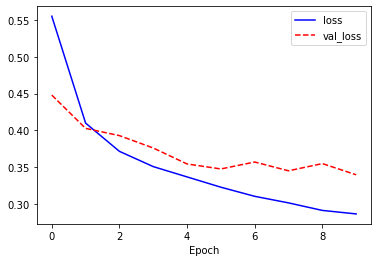

In [31]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Plot Accuracy

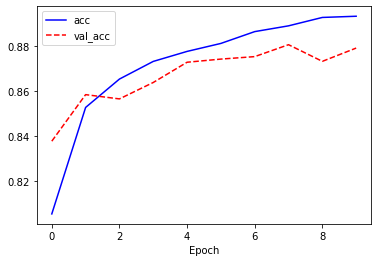

In [32]:
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### GradientTape 사용

loss function

In [39]:
loss_object = keras.losses.CategoricalCrossentropy()

optimizer

In [40]:
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss, accuracy 계산
- Mean : 한 epoch 당 평균 loss 값 계산

In [41]:
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

<b>GradientTape을 이용해서 backpropagation</b>
- @tf.function : 속도를 빠르게 해 주는 것
  - tensorflow가 2.x version으로 오면서 eager 모드가 되며 속도가 느려짐
  - 이걸 써 주면 graph 모드로 바뀌면서 속도 만회
  - 단, 이걸 썼을 때 def 함수 내부에서 print 같은 거 쓰면 제대로 print 되지 않음
  - debugging 필요할 때는 @tf.function 빼고 print 값 찍으면서 보다가, 잘 되면 print 없애고 속도 높이기
  - cf) keras API는 자동으로 graph 모드이기 때문에 따로 이런 decorator 필요 없음
- input 데이터부터 loss 계산하는 것까지 넣기
- predictions = model(images, training=True)
  - SubClassModel 만들 때 'call' 부분을 이때 사용하는 것

In [42]:
@tf.function
def train_step(model, images, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout)
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
        
    # backpropagation
    # model.trainable_variables : model의 모든 weight와 bias들
    # tape.gradient(loss, model.trainable_variables) : loss를 모든 weight와 bias로 미분
    gradients = tape.gradient(loss, model.trainable_variables)
    
    # model.trainable_variables(update할 weight, bias)에 미분 값(gradients) 적용 
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [43]:
@tf.function
def test_step(model, images, labels):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

### 10 epoch동안 실제 학습

In [44]:
EPOCHS = 10

for epoch in range(EPOCHS):
    
    # Reset the metrics at the start of the next epoch
    # loss와 accuracy가 이전 저장된 값이 들어가 있을 수 있기 때문에
    # 새로운 epoch에서는 loss와 accuracy 다시 0으로 바꿔줘야 함
    #train_loss=0
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    # for문을 돌며 계속 weight, bias update
    for images, labels in train_dataset:
        train_step(func_model, images, labels)
        
    for test_images, test_labels in test_dataset:
        test_step(func_model, test_images, test_labels)
    
    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
    )

Epoch 1, Loss: 0.5558942556381226, Accuracy: 80.58666229248047, Test Loss: 0.4456537365913391, Test Accuracy: 83.5300064086914
Epoch 2, Loss: 0.407953679561615, Accuracy: 85.47000122070312, Test Loss: 0.39753615856170654, Test Accuracy: 85.72000122070312
Epoch 3, Loss: 0.3677090108394623, Accuracy: 86.69499969482422, Test Loss: 0.37398165464401245, Test Accuracy: 86.58999633789062
Epoch 4, Loss: 0.3485054671764374, Accuracy: 87.30999755859375, Test Loss: 0.37234559655189514, Test Accuracy: 86.80999755859375
Epoch 5, Loss: 0.3297306299209595, Accuracy: 87.9000015258789, Test Loss: 0.3556123673915863, Test Accuracy: 87.1500015258789
Epoch 6, Loss: 0.3166009187698364, Accuracy: 88.29666137695312, Test Loss: 0.35885339975357056, Test Accuracy: 87.06999969482422
Epoch 7, Loss: 0.3072631359100342, Accuracy: 88.67166900634766, Test Loss: 0.36586782336235046, Test Accuracy: 86.40999603271484
Epoch 8, Loss: 0.3001553416252136, Accuracy: 88.93000030517578, Test Loss: 0.34519124031066895, Test Ac

---
# Model 저장하고 불러오기

- 모델을 매번 학습하면 매우 비효율적
- 학습한 결과를 저장해 놓고, 나중에 불러오기

## 1. Parameter만 저장하고 불러오기

- 학습된 weight와 bias만 저장
- 확장자 아무렇게나 해도 상관 없음
  - ckpt : checkpoint

In [45]:
seq_model.save_weights('seq_model.ckpt')

In [46]:
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

학습은 하지 않고 test set에 대한 loss와 accuracy만 확인
- 학습을 하나도 안 했으니 정확도가 4%

In [47]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 0s 2ms/step - loss: 2.4679 - accuracy: 0.0434


[2.4679315090179443, 0.04340000078082085]

이 상태에서 위에서 저장한 weight와 bias 덮어쓰기

In [48]:
seq_model_2.load_weights('seq_model.ckpt')

적용 후 결과 보면 정확도가 88%까지 올라간 것 볼 수 있음

In [49]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8792


[0.3393828272819519, 0.8791999816894531]

## 2. Model 전체를 저장하고 불러오기

In [50]:
seq_model.save('seq_model')

INFO:tensorflow:Assets written to: seq_model\assets


In [51]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [52]:
seq_model_3 = keras.models.load_model('seq_model')

In [53]:
seq_model_3.evaluate(test_dataset)

157/157 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8792


[0.3393828272819519, 0.8791999816894531]

---
# Tensorboard 사용하여 시각화하기

- 방법1) Keras Callback 사용
- 방법2) Tensorflow Summary Writer 사용

### Jupyter notebook에서 tensorboard 사용하기
- tensorboard는 학습된 결과 등을 눈으로 보기 쉽게 보여주는 시각화 툴
- pytorch에서도 이거 많이 사용함

In [55]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## 1. Keras Callback 사용

In [57]:
new_model_1 = create_seq_model()
new_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

학습은 하지 않고 test set에 대한 loss와 accuracy만 확인
- 학습을 하나도 안 했으니 정확도가 5%

In [58]:
new_model_1.evaluate(test_dataset)

157/157 [==============================] - 0s 1ms/step - loss: 2.3720 - accuracy: 0.0584


[2.3719992637634277, 0.058400001376867294]

logs/new_model_1
- 학습 과정에서 필요한 정보들을 저장할 곳 지정
- weight, bias 등

In [62]:
log_dir = './logs/new_model_1'

- histogram_freq=1 : 매 epoch마다 저장을 하겠다
- histogram : weight, bias 분포를 보여줌

In [63]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

callback에 필요한 정보 모두 저장
- callbacks = [tensorboard_cb, aaa, bbb]
  - tensorboard 말고도 다른 여러 개 쓸 수 있음
  - customize 해서 우리가 만들어서 쓸 수도 있음

In [65]:
new_model_1.fit(train_dataset,
                epochs=EPOCHS,
                validation_data=test_dataset,
                callbacks=[tensorboard_cb])

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5462 - accuracy: 0.8080 - val_loss: 0.4463 - val_accuracy: 0.8380
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4050 - accuracy: 0.8554 - val_loss: 0.3895 - val_accuracy: 0.8616
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3706 - accuracy: 0.8661 - val_loss: 0.3736 - val_accuracy: 0.8647
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3471 - accuracy: 0.8729 - val_loss: 0.3723 - val_accuracy: 0.8669
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3315 - accuracy: 0.8785 - val_loss: 0.3577 - val_accuracy: 0.8723
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3158 - accuracy: 0.8849 - val_loss: 0.3478 - val_accuracy: 0.8731
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3083 - accuracy: 0.8864 - val_loss: 0.3416 - val_accuracy: 0.8761
Epoch 

tensorboard 실행
- 원래 tensorboard는 chrome 등에서 접속해야 하는데, magic command '%' 사용해서 jupyter notebook에서도 열어볼 수 있음
- $log_dir : 경로
- epoch에 따른 accuracy, loss 값 변화 확인
- 메뉴
  - Graphs : 모델 학습에 필요했던 것들
  - Distributions, Histogram, Time Series : bias, kernel(weight) 분포

In [66]:
%tensorboard --logdir $log_dir

## 2. Summary Writer 사용

In [67]:
new_model_2 = create_seq_model()

loss function

In [68]:
loss_object = keras.losses.CategoricalCrossentropy()

optimizer

In [69]:
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss, accuracy 계산

In [70]:
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [71]:
@tf.function
def train_step(model, images, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout)
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
        
    # backpropagation
    # model.trainable_variables : model의 모든 weight와 bias들
    # tape.gradient(loss, model.trainable_variables) : loss를 모든 weight와 bias로 미분
    gradients = tape.gradient(loss, model.trainable_variables)
    
    # model.trainable_variables(update할 weight, bias)에 미분 값(gradients) 적용 
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [72]:
@tf.function
def test_step(model, images, labels):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

### writer 생성

logs/gradient_tape/ 하위 폴더에 파일 생성
- 시간에 따라 directory 명을 다르게 저장하고자 함
- tf.summary.create_file_writer(경로)

In [74]:
import datetime

current_time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [75]:
EPOCHS = 10

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    for images, labels in train_dataset:
        train_step(new_model_2, images, labels)
    
    # train_summary_writer 경로에 loss, accuracy 저장
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss.result(), step=epoch)
        tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)
        
    for test_images, test_labels in test_dataset:
        test_step(new_model_2, test_images, test_labels)
    
    # test_summary_writer 경로에 loss, accuracy 저장
    with test_summary_writer.as_default():
        tf.summary.scalar('loss', test_loss.result(), step=epoch)
        tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
        
    
    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
    )        

Epoch 1, Loss: 0.561118483543396, Accuracy: 80.288330078125, Test Loss: 0.44619035720825195, Test Accuracy: 83.47000122070312
Epoch 2, Loss: 0.4104568660259247, Accuracy: 85.4366683959961, Test Loss: 0.3975033164024353, Test Accuracy: 85.43000030517578
Epoch 3, Loss: 0.3688129484653473, Accuracy: 86.57167053222656, Test Loss: 0.3724946677684784, Test Accuracy: 86.51000213623047
Epoch 4, Loss: 0.3475319743156433, Accuracy: 87.46666717529297, Test Loss: 0.36815035343170166, Test Accuracy: 86.72000122070312
Epoch 5, Loss: 0.3330802917480469, Accuracy: 87.94499969482422, Test Loss: 0.3530837893486023, Test Accuracy: 87.4800033569336
Epoch 6, Loss: 0.3204171359539032, Accuracy: 88.11333465576172, Test Loss: 0.34556785225868225, Test Accuracy: 86.98999786376953
Epoch 7, Loss: 0.3103460669517517, Accuracy: 88.61499786376953, Test Loss: 0.35429081320762634, Test Accuracy: 87.19000244140625
Epoch 8, Loss: 0.3002924919128418, Accuracy: 88.86000061035156, Test Loss: 0.3444038927555084, Test Accur

지금은 한 번밖에 안 했으니 train, validation 한 개 씩만 그래프로 보임
- 다른 시간 대에 여러 번 training 하면 달라진 data 계속 쌓이면서 train 할 때마다 결과 변화 그래프로 한 눈에 비교 가능

In [76]:
%tensorboard --logdir 'logs/gradient_tape'